# 1. Load Modules

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import scale
from statsmodels.multivariate.pca import PCA

C:\Users\chong\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# 2. Load Field Data & Data Pre-processing

In [2]:
tick_df = pd.read_csv("Tick_DB.csv")
tick_df = tick_df.drop(["pid", "lat", "lat", "fid"], axis=1)
tick_df = tick_df[tick_df.temp.notnull()]

# 3. Define Functions for Principle Component Analysis

In [3]:
# Construct Dataframe with respect to predictor variables & response variable
def Var_Builder(df, dep_y, ind_x):
    y = df[dep_y]
    X = df[ind_x]
    return(y, X)

# Principle component analysis
def PCA_Analysis(X):
    var_num = X.shape[1] # Count number of variables involved in PCA
    
    # Initialize PCA
    pca = PCA(X, ncomp=var_num)
    
    # 5A.Compute Eigenvalue Matrix
    eigen_Mat = DataFrame(0, columns=["Eigenvalue", "Variance"], index=np.arange(var_num))
    eigen_Mat["Variance"] = pca.eigenvals / sum(pca.eigenvals)
    eigen_Mat["Eigenvalue"] = pca.eigenvals / sum(pca.eigenvals) * var_num
    
    # 5B.Compute Component Matrix
    ldings = pca.loadings
    comp_Mat = ldings[ldings.columns[0:2]] # Use 2 principle components
    comp_Mat.columns = ["Component_1", "Component_2"]
    return(eigen_Mat, comp_Mat)

# Visualize scree plot & loading plot
def PCA_Visualization(eigen_Mat, comp_Mat):
    # Scree Plot
    fig, ax = plt.subplots()
    ax.plot(eigen_Mat.index, eigen_Mat["Eigenvalue"], "--o", linewidth=0.5)
    for i in eigen_Mat.index:
        ax.annotate(round(eigen_Mat.loc[i, "Eigenvalue"], 3), [i, eigen_Mat.loc[i, "Eigenvalue"]], fontsize=9)
    plt.xlabel("Component Index")
    plt.ylabel("Eigenvalue")
    plt.show()
    
    # Loading Plot
    fig, ax = plt.subplots()
    ax.scatter(comp_Mat["Component_1"], comp_Mat["Component_2"], color="orange")
    for i in comp_Mat.index:
        ax.plot([comp_Mat.loc[i, "Component_1"],0], [comp_Mat.loc[i, "Component_2"],0], "k--", linewidth=0.5)
        ax.annotate(i, [comp_Mat.loc[i, "Component_1"], comp_Mat.loc[i, "Component_2"]], fontsize=9)
    ax.plot([-1.1, 1.1], [0, 0], "k-", linewidth=0.5)
    ax.plot([0, 0], [-1.1, 1.1], "k-", linewidth=0.5)
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("Component_1")
    plt.ylabel("Component_2")
    plt.show()

# 4. Define Subsets for Scenarios

In [4]:
# Scenario 1
S1 = tick_df

# Scenario 2
tick_df.date = pd.to_datetime(tick_df.date)
mask_17 = ('2017-08-01' > tick_df.date) & (tick_df.date > '2017-03-01') # Spring in 2017
mask_18 = ('2018-08-01' > tick_df.date) & (tick_df.date > '2018-03-01') # Spring in 2018
S2 = tick_df[mask_17 | mask_18]

# Scenario 3
S3 = S2[S2.host_hbt.notnull()]

# 5. Apply PCA to S1, S2, S3 and Visualize

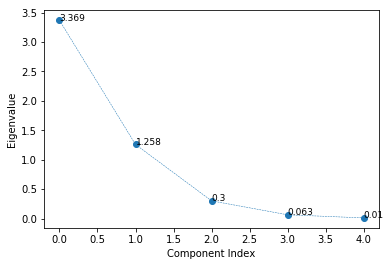

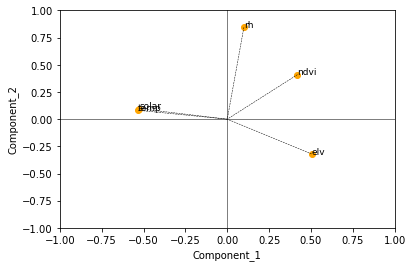

In [5]:
# Scenario 1
res = ["t_adult"]
ind = ["temp", "rh", "elv", "solar", "ndvi"]

Y1, X1 = Var_Builder(S1, res, ind)
scr1, ld1 = PCA_Analysis(X1)
PCA_Visualization(scr1, ld1)

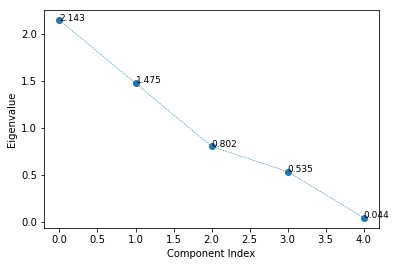

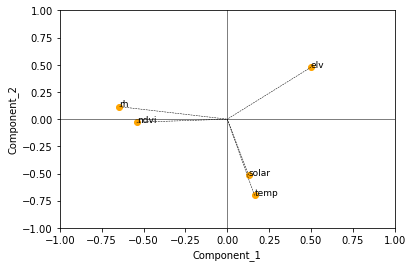

In [6]:
# Scenario 2
res = ["t_adult"]
ind = ["temp", "rh", "elv", "solar", "ndvi"]

Y2, X2 = Var_Builder(S2, res, ind)
scr2, ld2 = PCA_Analysis(X2)
PCA_Visualization(scr2, ld2)

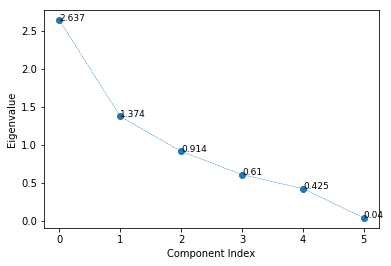

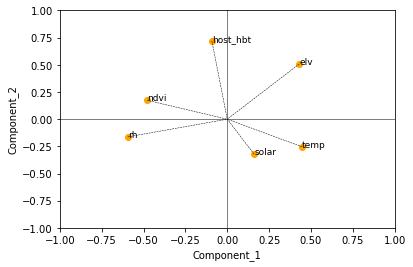

In [7]:
# Scenario 3
res = ["t_adult"]
ind = ["temp", "rh", "elv", "solar", "ndvi", "host_hbt"]

Y3, X3 = Var_Builder(S3, res, ind)
scr3, ld3 = PCA_Analysis(X3)
PCA_Visualization(scr3, ld3)